# Categorical data

In [1]:
import edward as ed
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from edward.models import Normal, Categorical, Dirichlet, Empirical

In [2]:
n = 4000
k = 10
alpha0 = 1

In [3]:
#probs = np.array([0.1, 0.01, 0.3, 0.6, 0.1], dtype=np.float32)
#probs /= sum(probs)
probs = np.random.dirichlet(alpha0*np.ones(k, dtype=np.float32))
X = np.random.choice(k, n, p=probs)

In [4]:
np.round(probs,3)

array([ 0.21 ,  0.075,  0.069,  0.222,  0.018,  0.237,  0.074,  0.051,
        0.019,  0.026])

In [5]:
d = Dirichlet(alpha0*np.ones(k, dtype=np.float32))
c = Categorical(probs = d, sample_shape=(n))

In [6]:
sess = tf.Session()
with sess.as_default():
    init = tf.global_variables_initializer()
    init.run()
    print(c.sample(100).eval())

[6 5 5 1 1 6 2 5 1 1 5 6 1 3 5 1 3 1 1 5 9 1 5 1 5 4 5 0 9 7 5 1 4 9 1 1 6
 3 1 1 9 5 6 8 3 8 6 7 2 1 2 5 6 3 5 9 5 4 5 3 1 3 3 1 1 5 9 1 9 9 6 5 4 5
 9 3 1 2 7 6 7 1 8 6 4 2 5 5 7 5 1 4 4 3 7 9 5 6 5 1]


In [7]:
qalpha0 =  tf.nn.softplus(tf.Variable(tf.random_normal([k], dtype=tf.float32)))
#qalpha0 =  tf.nn.softmax(tf.Variable(tf.random_normal([k], dtype=tf.float32)))
qd = Dirichlet(qalpha0)

In [8]:
inference = ed.KLqp({d: qd}, data={c: X})
inference.initialize(n_iter=100000, n_print=100, n_samples=10, optimizer='rmsprop')

In [9]:
sess = ed.get_session()
init = tf.global_variables_initializer()
init.run()

In [10]:
learning_curve = []
for _ in range(inference.n_iter):
    info_dict = inference.update()
    if _%1000 == 0:
        print(qalpha0.eval())
        print(info_dict)
    learning_curve.append(info_dict['loss'])
plt.semilogy(learning_curve)

[ 0.8159861   0.86072719  0.50253981  0.085672    0.3925198   0.69016033
  0.67465794  0.49907023  1.12170863  0.9996447 ]
{'loss': 21699.023, 't': 1}
[ 1.766958    0.80312622  0.66157877  1.31784153  0.36281425  1.41051471
  0.51444685  0.46317869  0.60711861  0.56116998]
{'loss': 10538.963, 't': 1001}
[ 1.90811336  0.87993062  0.830374    2.04136729  0.29261154  2.25398302
  0.9343909   0.55565703  0.57387972  0.62689298]
{'loss': 9609.2344, 't': 2001}
[ 2.42835832  0.98763454  0.98213279  2.38319588  0.35291564  2.64152122
  1.11234248  0.52584541  0.49462798  0.56374091]
{'loss': 9284.8418, 't': 3001}
[ 2.68973494  1.31149554  1.22566104  2.89682078  0.506194    2.97907591
  1.12976253  0.50238097  0.45136711  0.35517573]
{'loss': 9291.3135, 't': 4001}
[ 2.57027197  1.51138413  1.19891739  3.13514256  0.48160186  3.59681654
  1.33986938  0.83596182  0.50165069  0.56925583]
{'loss': 9082.4238, 't': 5001}
[ 3.36984658  1.25664413  1.08155918  3.28232694  0.65786982  3.7398808
  1.574

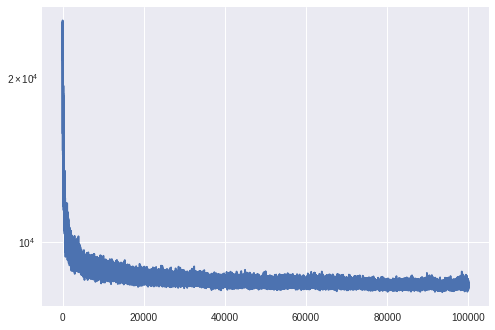

In [11]:
plt.show()

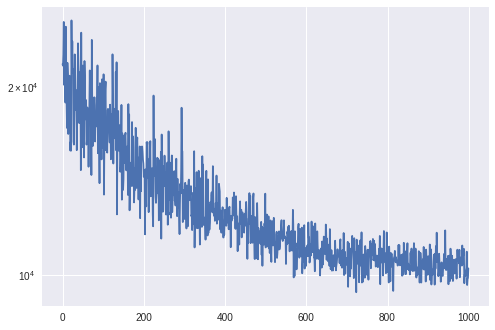

In [29]:
plt.semilogy(learning_curve[:1000])
plt.show()

In [32]:
inference2 = ed.KLqp({d: qd}, data={c: X})
inference2.initialize(n_iter=1000, n_print=100, n_samples=100, optimizer='rmsprop')
sess = ed.get_session()
learning_curve2 = []
for _ in range(inference2.n_iter):
    info_dict = inference2.update()
    if _%1000 == 0:
        print(qalpha0.eval())
        print(info_dict)
    learning_curve2.append(info_dict['loss'])
plt.semilogy(learning_curve2)

FailedPreconditionError: Attempting to use uninitialized value iteration_3
	 [[Node: AssignAdd_3 = AssignAdd[T=DT_INT32, _class=["loc:@iteration_3"], use_locking=false, _device="/job:localhost/replica:0/task:0/cpu:0"](iteration_3, AssignAdd_3/value)]]

Caused by op 'AssignAdd_3', defined at:
  File "/home/folzd/anaconda3/lib/python3.5/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/folzd/anaconda3/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/folzd/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/folzd/anaconda3/lib/python3.5/site-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/home/folzd/anaconda3/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/folzd/anaconda3/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/home/folzd/anaconda3/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/folzd/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/folzd/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/folzd/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/folzd/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/folzd/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/folzd/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/folzd/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/folzd/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/folzd/anaconda3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/folzd/anaconda3/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 498, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/folzd/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/folzd/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/folzd/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-a793e260a0b5>", line 2, in <module>
    inference2.initialize(n_iter=1000, n_print=100, n_samples=100, optimizer='rmsprop')
  File "/home/folzd/AUML/edward-gmm-bo/src/edward/edward/inferences/klqp.py", line 86, in initialize
    return super(KLqp, self).initialize(*args, **kwargs)
  File "/home/folzd/AUML/edward-gmm-bo/src/edward/edward/inferences/variational_inference.py", line 54, in initialize
    super(VariationalInference, self).initialize(*args, **kwargs)
  File "/home/folzd/AUML/edward-gmm-bo/src/edward/edward/inferences/inference.py", line 186, in initialize
    self.increment_t = self.t.assign_add(1)
  File "/home/folzd/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 527, in assign_add
    return state_ops.assign_add(self._variable, delta, use_locking=use_locking)
  File "/home/folzd/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/state_ops.py", line 239, in assign_add
    ref, value, use_locking=use_locking, name=name)
  File "/home/folzd/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/gen_state_ops.py", line 75, in assign_add
    use_locking=use_locking, name=name)
  File "/home/folzd/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "/home/folzd/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/folzd/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value iteration_3
	 [[Node: AssignAdd_3 = AssignAdd[T=DT_INT32, _class=["loc:@iteration_3"], use_locking=false, _device="/job:localhost/replica:0/task:0/cpu:0"](iteration_3, AssignAdd_3/value)]]


In [12]:
d_est_mean = qd.mean().eval()

In [13]:
d_est_sd = tf.sqrt(qd.variance()).eval()

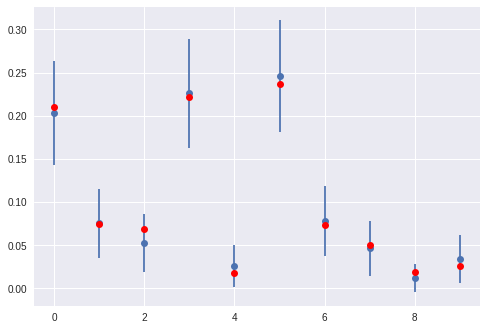

In [14]:
plt.errorbar(np.arange(k), d_est_mean, yerr = d_est_sd, fmt='o')
plt.errorbar(np.arange(k), qd.mode().eval(), fmt='o', color='g')
plt.errorbar(np.arange(k), probs, fmt='o', color='r')
plt.show()

In [15]:
d_est_mean

array([ 0.20335548,  0.07551807,  0.05234647,  0.22602084,  0.02599313,
        0.245626  ,  0.07832026,  0.04640102,  0.01215267,  0.03426605], dtype=float32)

In [16]:
probs

array([ 0.20972796,  0.07508525,  0.06857821,  0.22179703,  0.01794082,
        0.23687922,  0.07391617,  0.05060499,  0.01928421,  0.02618614])

In [17]:
X_sim = ed.copy(c, {d: qd})

In [18]:
X_sim_sample = X_sim.sample(n).eval()

In [19]:
probs_MLE, _ = np.histogram(X,bins=np.arange(k+1),normed=True)

In [20]:
probs_MLE

array([ 0.21375,  0.075  ,  0.064  ,  0.221  ,  0.0195 ,  0.2425 ,
        0.07375,  0.04425,  0.0185 ,  0.02775])

In [21]:
np.dot(probs, probs)/np.linalg.norm(probs)**2

1.0

In [22]:
np.dot(probs_MLE, probs)/(np.linalg.norm(probs)*np.linalg.norm(probs_MLE))

0.99969835094387582

In [23]:
probs_ADVI, _ = np.histogram(X_sim_sample,bins=np.arange(k+1),normed=True)

In [24]:
np.dot(probs_ADVI, probs)/(np.linalg.norm(probs)*np.linalg.norm(probs_ADVI))

0.91605744416995594

In [26]:
np.dot(d_est_mean, probs)/(np.linalg.norm(probs)*np.linalg.norm(d_est_mean))

0.99821522714705391